In [1]:
import numpy as np
import pandas as pd
import os 
import glob
import pdb
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scipy as sp
from scipy.special import expit
import sys

In [2]:
sys.path.append(os.path.dirname(os.getcwd()))
from visualisation_and_evaluation.helpers_eval import extract_scores, wa, select_best_run
from visualisation_and_evaluation.helpers_vizualisation import plot_scores

In [3]:
path_scores = r'../eval_scores'
path_figures = r'../figures/summary_figures/simulated'
if not os.path.isdir(path_figures):
    os.makedirs(path_figures)

files = [x for x in os.listdir(path_scores) if 'toy' in x and 'score' in x and 'subset' not in x and 'png' not in x]
selection_method = 'wa'  # 'wa' (weighted average), 'div' (based on divergence score only)
eval_all = pd.read_csv(os.path.join(path_scores, 'scores_baselines_toy.csv'), index_col=[0])
eval_all['silhouette_score_neg'] = -eval_all['silhouette_score']
for fname in files:
    if (fname == 'scores_baselines_toy.csv'):
        continue
    print(fname)
    df = extract_scores(path_scores, fname)
    # select "the best run"
    df_best = select_best_run(df, method=selection_method)
    df_best = df_best.loc[:, eval_all.columns]
    if df_best['sample'].values == 'toy':
        df_best['sample'] = 'sample1'
    eval_all = eval_all.append(df_best)
eval_all = eval_all.sort_values(['sample', 'method']).reset_index(drop=True)

scores_autoencoder_gan_narrower_batchnorm_toy.csv
scores_autoencoder_gan_wider_batchnorm_toy.csv
scores_residual_gan_toy_sample1.csv
scores_residual_gan_wo_residuals_full_panels_toy_sample1.csv
scores_vanilla_gan_batchnorm_toy.csv


C:\Users\heida\Documents\ETH\Deep Learning\2019_DL_Class\visualisation_and_evaluation\helpers_eval.py:205: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.index_name = ['epoch']


In [4]:
# add the weighted averaged score
eval_all['wa'] = eval_all[['divergence_score', 'entropy_score', 'silhouette_score_neg']].apply(lambda x: wa(x), axis=1)
eval_all

,divergence_score,entropy_score,method,sample,silhouette_score,silhouette_score_neg,wa
0,0.666738,-1.0,autoencoder gan narrower batchnorm toy.csv,sample1,-0.048829,0.048829,0.513510
1,0.071145,-1.0,autoencoder gan wider batchnorm toy.csv,sample1,-0.070570,0.070570,0.443099
2,0.028546,-1.0,combat,sample1,-0.069337,0.069337,0.437716
3,0.010673,-1.0,mnn,sample1,-0.075526,0.075526,0.435791
4,0.012873,-1.0,raw,sample1,-0.069232,0.069232,0.435752
5,0.046978,-1.0,reg,sample1,-0.036064,0.036064,0.438357
6,0.060172,-1.0,residual gan toy,sample1,-0.043241,0.043241,0.440363
7,0.216434,-1.0,residual gan wo residuals full panels toy,sample1,-0.036618,0.036618,0.459462
8,0.119481,-1.0,vanilla gan batchnorm toy.csv,sample1,-0.042641,0.042641,0.447732


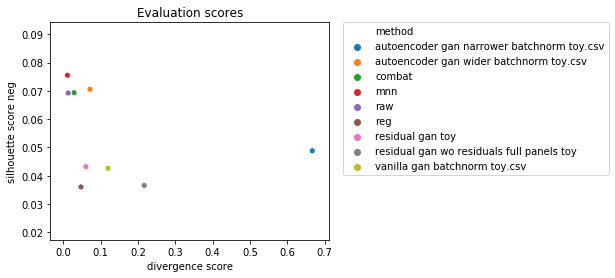

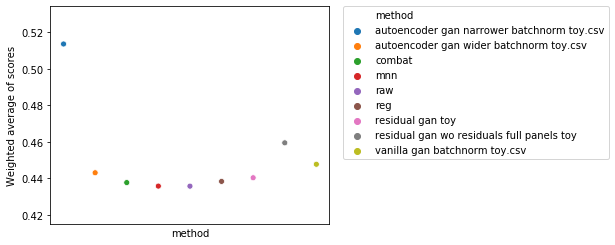

In [5]:
### plot scores
#f, axes = plt.subplots(1, 2, figsize=[10,4], sharex=True)
#plot_scores(eval_all, xcol='divergence_score', ycol='entropy_score',ax = axes[0], legend=False)
plt.figure(figsize=[5,4])
plot_scores(eval_all, xcol='divergence_score', ycol='silhouette_score_neg')
plt.savefig(os.path.join(path_figures, 'summary_scores_all_toy.png'),  bbox_inches='tight')

plt.figure(figsize=[5,4])
score_plot = sns.scatterplot(x='method', y='wa', data=eval_all,
                hue='method', legend='brief', ax = None)
handles, names = score_plot.get_legend_handles_labels()
score_plot.legend(handles, names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
score_plot.set_xticks([])
score_plot.set_ylabel('Weighted average of scores')
plt.savefig(os.path.join(path_figures, 
                         'summary_scores_wa_toy.png'),  bbox_inches='tight')

In [6]:
path_scores = r'C:\Users\heida\Documents\ETH\Deep Learning\scores_04.01 - Copy\eval_scores'

files = [x for x in os.listdir(path_scores) if 'toy_subset' in x and 'score' in x and 'png' not in x]
selection_method = 'wa'  # 'wa' (weighted average), 'div' (based on divergence score only)
eval_all = pd.read_csv(os.path.join(path_scores, 'scores_baselines_toy_subset.csv'), index_col=[0])
eval_all['silhouette_score_neg'] = -eval_all['silhouette_score']
for fname in files:
    if (fname == 'scores_baselines_toy_subset.csv'):
        continue
    print(fname)
    df = extract_scores(path_scores, fname)
    # select "the best run"
    df_best = select_best_run(df, method=selection_method)
    df_best = df_best.loc[:, eval_all.columns]
    if df_best['sample'].values == 'subset':
        df_best['sample'] = 'sample1'
    eval_all = eval_all.append(df_best)
eval_all = eval_all.sort_values(['sample', 'method']).reset_index(drop=True)

scores_autoencoder_gan_narrower_batchnorm_toy_subset.csv
scores_autoencoder_gan_wider_batchnorm_toy_subset.csv
scores_residual_gan_toy_subset_sample1.csv
scores_residual_gan_wo_residuals_toy_subset_sample1.csv
scores_vanilla_gan_batchnorm_toy_subset.csv


In [7]:
# add the weighted averaged score
eval_all['wa'] = eval_all[['divergence_score', 'entropy_score', 'silhouette_score_neg']].apply(lambda x: wa(x), axis=1)
eval_all

,divergence_score,entropy_score,method,sample,silhouette_score,silhouette_score_neg,wa
0,0.505870,0.567308,autoencoder gan narrower batchnorm toy subset.csv,sample1,-0.079052,0.079052,0.607312
1,0.061244,0.674565,autoencoder gan wider batchnorm toy subset.csv,sample1,-0.081062,0.081062,0.560461
2,0.027731,0.683843,combat,sample1,-0.098683,0.098683,0.557775
3,0.026457,0.686715,mnn,sample1,-0.094091,0.094091,0.557579
4,0.015077,0.686261,raw,sample1,-0.077280,0.077280,0.555287
5,0.089599,0.680653,reg,sample1,-0.038874,0.038874,0.562301
6,0.050457,0.675075,residual gan toy subset,sample1,-0.073137,0.073137,0.558753
7,0.198479,0.640554,residual gan wo residuals toy subset,sample1,-0.066697,0.066697,0.574526
8,0.097782,0.669972,vanilla gan batchnorm toy subset.csv,sample1,-0.093997,0.093997,0.565358


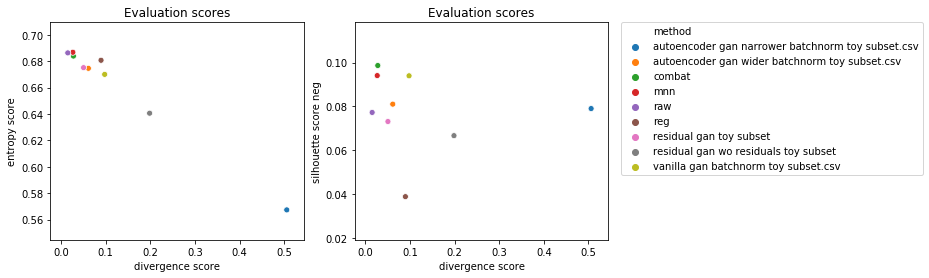

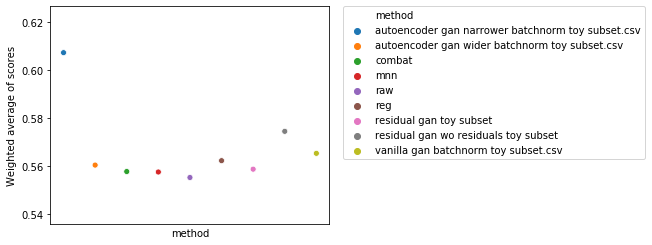

In [8]:
### plot scores
#f, axes = plt.subplots(1, 2, figsize=[10,4], sharex=True)
#plot_scores(eval_all, xcol='divergence_score', ycol='entropy_score',ax = axes[0], legend=False)

f, axes = plt.subplots(1, 2, figsize=[10,4], sharex=True)
plot_scores(eval_all, xcol='divergence_score', ycol='entropy_score',ax = axes[0], legend=False)
plot_scores(eval_all, xcol='divergence_score', ycol='silhouette_score_neg',ax = axes[1])
plt.savefig(os.path.join(path_figures, 'summary_scores_all_toy_subset.png'),  bbox_inches='tight')

plt.figure(figsize=[5,4])
score_plot = sns.scatterplot(x='method', y='wa', data=eval_all,
                hue='method', legend='brief', ax = None)
handles, names = score_plot.get_legend_handles_labels()
score_plot.legend(handles, names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
score_plot.set_xticks([])
score_plot.set_ylabel('Weighted average of scores')
plt.savefig(os.path.join(path_figures, 
                         'summary_scores_wa_toy_subset.png'),  bbox_inches='tight')